In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [48]:
df = pd.read_csv('data/results.csv', usecols=['meters', 'price', 'rooms', 'dealer', 'district'], na_values=['Zapytajocenę'])

In [161]:
def shapiro_test(data):
    test = sp.stats.shapiro(data)
    st, pv = test
    print("{} : Test Shapiro-Wilka.\n"
          "P-value wynosi:{}".format(data.name, pv))
    if pv > 0.05:
        return "Rozklad normalny : TAK"
    if pv < 0.05:
        return "Rozklad normalny : NIE"

In [162]:
def plot_test(data, minimum, maximum, i=0):
    fig = plt.figure(i)
    m, s = sp.stats.norm.fit(data)
    plt.subplot(131)
    plt.axis([minimum, maximum, 0, 1])
    ecdf = ECDF(data)
    plt.step(ecdf.x, ecdf.y, 'r-', label=r'$\hat{F}_n(x)$')

    t1 = np.linspace(minimum, maximum, 100)
    t2 = sp.stats.norm.cdf(t1, loc=m, scale=s)
    t3 = sp.stats.norm.pdf(t1, loc=m, scale=s)
    plt.plot(t1, t2, 'b--', label=r'$\mathrm{N}(%.2f, %.2f)$' % (m, s))
    plt.legend(loc='best')

    plt.subplot(132)
    sns.distplot(data, bins=8, color='k')
    plt.plot(t1, t3, 'g--')

    plt.subplot(133)
    sp.stats.probplot(data, dist=sp.stats.norm, plot=plt)
    plt.show()
    fig.savefig(str(data.name) + '_normal_distribution_test.pdf')

In [163]:
q = df["meters"].quantile(0.99)
df = df[df["meters"] < q]

In [164]:
shapiro_test(df.meters)

meters : Test Shapiro-Wilka.
P-value wynosi:1.5526992669032125e-12


'Rozklad normalny : NIE'

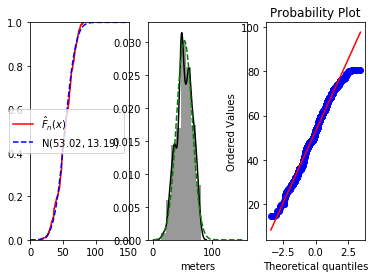

In [165]:
plot_test(df.meters, 0, 150)

In [166]:
q = df["price"].quantile(0.99)
df = df[df["price"] < q]

In [167]:
shapiro_test(df.price)

price : Test Shapiro-Wilka.
P-value wynosi:3.7599072300054104e-08


'Rozklad normalny : NIE'

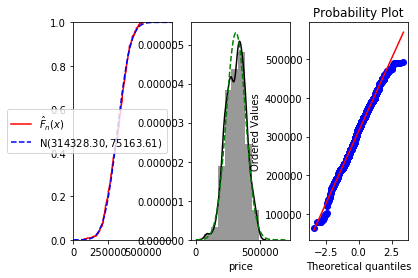

In [168]:
plot_test(df.price, 0, 700000)